In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
import itertools
import warnings
import time
warnings.filterwarnings("ignore")
#from sklearn import metrics

In [3]:
# Reading the data and printing the head of it
flu_df = pd.read_csv('flu_data.csv')
flu_df.head(10)

,Student,Vaccin,HndWshQual,HndWshFreq,SociDist,NoFaceContact,RespEttiqu,PersnDist,HandSanit,Risk,Complications,Barriers,Inefficacy,KnowlTrans,KnowlMgmt,Sick,Flu,Female
0,1,3,4,4,2,1,5,1,1,-0.770,-1.453,0.000,0.929,-0.554,0.000,0.0,0.0,1.0
1,2,2,4,4,5,2,5,4,4,-0.345,0.000,-0.489,0.149,-0.554,1.482,1.0,0.0,0.0
2,3,3,2,2,2,3,2,2,1,-0.406,-0.575,-0.234,0.693,-0.182,-1.482,0.0,0.0,0.0
3,4,3,3,2,2,2,5,3,1,-0.575,-0.197,-0.429,0.000,0.554,0.000,2.0,1.0,NaN
4,5,2,5,3,3,2,5,5,3,0.000,-0.770,0.097,0.546,0.554,0.684,1.0,0.0,0.0
5,6,2,5,5,3,3,2,3,1,0.169,-0.169,-0.726,0.370,0.951,0.684,2.0,1.0,0.0
6,7,5,4,3,3,2,5,4,3,0.345,0.406,-0.543,-1.040,0.951,1.059,1.0,0.0,0.0
7,8,1,4,5,3,2,5,4,3,-0.169,0.000,-0.289,-1.336,1.393,-0.335,NaN,NaN,NaN
8,9,2,4,3,1,3,5,3,2,-0.345,-0.523,-0.621,0.287,NaN,0.335,1.0,0.0,0.0
9,10,2,4,3,2,2,2,4,1,-0.169,-0.376,0.000,0.000,-1.393,-0.335,1.0,0.0,1.0


In [4]:
# Checking the shape and columns of the data
print("Shape of the data",flu_df.shape)
print("All the columns in the data",flu_df.columns)

Shape of the data (410, 18)
All the columns in the data Index(['Student', 'Vaccin', 'HndWshQual', 'HndWshFreq', 'SociDist',
       'NoFaceContact', 'RespEttiqu', 'PersnDist', 'HandSanit', 'Risk',
       'Complications', 'Barriers', 'Inefficacy', 'KnowlTrans', 'KnowlMgmt',
       'Sick', 'Flu', 'Female'],
      dtype='object')


In [5]:
# Checking the datatypes
print("Datatypes of the data",flu_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student        410 non-null    int64  
 1   Vaccin         410 non-null    int64  
 2   HndWshQual     410 non-null    int64  
 3   HndWshFreq     410 non-null    int64  
 4   SociDist       410 non-null    int64  
 5   NoFaceContact  410 non-null    int64  
 6   RespEttiqu     410 non-null    int64  
 7   PersnDist      410 non-null    int64  
 8   HandSanit      410 non-null    int64  
 9   Risk           410 non-null    float64
 10  Complications  410 non-null    float64
 11  Barriers       410 non-null    float64
 12  Inefficacy     410 non-null    float64
 13  KnowlTrans     409 non-null    float64
 14  KnowlMgmt      410 non-null    float64
 15  Sick           374 non-null    float64
 16  Flu            374 non-null    float64
 17  Female         375 non-null    float64
dtypes: float64

In [6]:
# Checking for any missing values in the data
flu_df.isna().sum()

Student           0
Vaccin            0
HndWshQual        0
HndWshFreq        0
SociDist          0
NoFaceContact     0
RespEttiqu        0
PersnDist         0
HandSanit         0
Risk              0
Complications     0
Barriers          0
Inefficacy        0
KnowlTrans        1
KnowlMgmt         0
Sick             36
Flu              36
Female           35
dtype: int64

In [9]:
# Dropping all the records with missing values since the number of missing rows are less
flu_df.dropna(inplace = True)

In [10]:
#  No missing records in the data
flu_df.isna().sum()

Student          0
Vaccin           0
HndWshQual       0
HndWshFreq       0
SociDist         0
NoFaceContact    0
RespEttiqu       0
PersnDist        0
HandSanit        0
Risk             0
Complications    0
Barriers         0
Inefficacy       0
KnowlTrans       0
KnowlMgmt        0
Sick             0
Flu              0
Female           0
dtype: int64

## 1. Exploratory Data Analysis (30 points)
a) Consider the following numeric variables in the dataset: Vaccin, HndWshQual, HndWshFreq, SociDist, NoFaceContact, RespEttiqu, PersnDist, and HandSanit. Summarize the statistics of these variables into count, mean, standard deviation, minimum, 25% percentile, 50% percentile, 75% percentile, and maximum. (5)

In [11]:
# Printing the describe stats for specified features
stats = flu_df[['Vaccin', 'HndWshQual', 'HndWshFreq', 'SociDist', 'NoFaceContact', 'RespEttiqu', 'PersnDist', 'HandSanit']]
print("Describe statistics of the data")
stats.describe()

Describe statistics of the data


,Vaccin,HndWshQual,HndWshFreq,SociDist,NoFaceContact,RespEttiqu,PersnDist,HandSanit
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,3.393162,3.917379,3.222222,2.911681,2.467236,4.193732,3.407407,2.806268
std,1.368778,1.020650,1.132212,1.176268,1.255130,1.212820,1.149833,1.606083
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000
50%,3.000000,4.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000
75%,5.000000,5.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000
max,9.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.000000,5.000000


b) Is there a way to encode female variable as a categorical/string data type? If so, how would you do that? Similarly, explain how would you encode the variable sick and flu from numeric type to categorical type?
Description of Female, Sick and Flu variables:
• For Female (1 = yes; 0 = no)
• Whether or not the person has been sick in the past year (0 = not; 1 = cold-like symptoms; 2 = flu-like symptoms)
• Whether or not the person has had a flu-like illness in the past year (0 = not; 1 = flu-like symptoms)

In [12]:
# Encode "Female" variable as a string
flu_df["Female"] = flu_df["Female"].apply(lambda x: "female" if x == 1 else "male")

# Encode "Sick" variable as a string
flu_df["Sick"] = flu_df["Sick"].apply(lambda x: "not" if x == 0 else "cold" if x == 1 else "flu")

# Encode "Flu" variable as a string
flu_df["Flu"] = flu_df["Flu"].apply(lambda x: "not" if x == 0 else "flu")

c) Consider the above converted categorical variables in the dataset: gender, sick and flu. Summarize the statistics of these variables into count, unique value, top value, and frequency of top value.

In [13]:
# Female
# Summarize statistics of categorical variables
categorical_variables = ["Female", "Sick", "Flu"]
for var in categorical_variables:
    print("Variable:", var)
    print(flu_df[var].describe())
    print("\n")

Variable: Female
count        351
unique         2
top       female
freq         190
Name: Female, dtype: object


Variable: Sick
count      351
unique       3
top       cold
freq       203
Name: Sick, dtype: object


Variable: Flu
count     351
unique      2
top       not
freq      283
Name: Flu, dtype: object




d) Do you think there is any redundant feature present in the dataset. If so, explain how removing it won't impact the analysis. Also, based on the experiments so far, were there any interesting observations for the variables?

HndWshQual, Inefficacy, Barriers features seem to be redundant because of the quality of which it is obtained. For rest other features, those are standard measures picked from data. whereas these features has the manual aspect which may not be true all times. 

e) What is the correlation between SociDist and PersnDist? Does this imply that people who maintain social distancing also tend to maintain personal distance? (5)

In [14]:
# Calculate correlation between "SociDist" and "PersnDist" variables
correlation = flu_df["SociDist"].corr(flu_df["PersnDist"])
print("Correlation between SociDist and PersnDist:", correlation)

Correlation between SociDist and PersnDist: 0.11329107160936322


# 2. Logistic Regression with One Variable (20 points)
a) Can you map the Risk (Risk) of contracting influenza (x) to Flu (y) i.e., whether the student reported flu-like symptoms in the past year?

In [15]:
# Sigmoid function
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

# Loss function
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Gradient function
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

# Weight loss function
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [16]:
# Assigning the specified features to x and y
X = flu_df[['Risk']]
y = flu_df['Flu']

# Encoding the y column to numerical
y.replace(['not','flu'] , [0,1],inplace = True)

num_iter = 100000

# Calling the intercept and calculating the theta value
intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)


b) Evaluate performance using a metric discussed in class (such as confusion matrix). You may also use graphs for explaining your observations.

In [17]:
result = sigmoid(X, theta)

# Calculating accuracy
res_table = pd.DataFrame(np.around(result, decimals=6)).join(y)
res_table['prediction'] = res_table[0].apply(lambda x : 0 if x < 0.5 else 1)

print("Accuracy :", res_table.loc[res_table['prediction']==res_table['Flu']].shape[0] / res_table.shape[0] * 100)

Accuracy : 63.817663817663814


CONFUSION MATRIX
[[275  17]
 [ 59   0]]


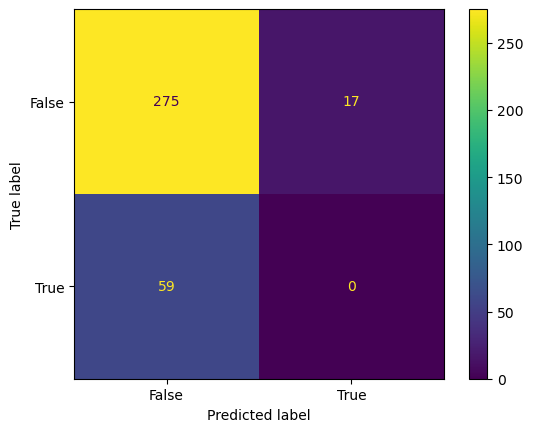

In [18]:

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(res_table['Flu'].fillna(0),res_table['prediction'])
print("CONFUSION MATRIX")
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# 3. Logistic Regression with Multiple Variables (40 points)
a) Design a Logistic Regression model to predict whether a student reported flu-like symptoms in the past year i.e., Flu(y) using below 12 variables in the dataset as input variables:
Vaccin, HndWshQual, HndWshFreq, SociDist, NoFaceContact, RespEttiqu, PersnDist, HandSanit, Risk, Inefficacy, KnowlTrans, KnowlMgmt

In [18]:
# Considering all the features mentioned in the question
feat = ['Vaccin', 'HndWshQual', 'HndWshFreq', 'SociDist', 'NoFaceContact', 'RespEttiqu',
          'PersnDist', 'HandSanit', 'Risk', 'Inefficacy', 'KnowlTrans', 'KnowlMgmt']

X = flu_df[feat]
y = flu_df['Flu']

In [19]:
# Encoding the y column to numerical
y.replace(['not','flu'] , [0,1],inplace = True)

# Calling the intercept and calculating the theta value
intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)

In [20]:
result = sigmoid(X, theta)

# Calculating accuracy
res_table = pd.DataFrame(np.around(result, decimals=6)).join(y)
res_table['prediction'] = res_table[0].apply(lambda x : 0 if x < 0.5 else 1)

print("Accuracy of logistic regression model for 3a :", res_table.loc[res_table['prediction'] == res_table['Flu']].shape[0] / res_table.shape[0] * 100)

Accuracy of logistic regression model for 3a : 64.38746438746439


CONFUSION MATRIX
[[270  22]
 [ 54   5]]


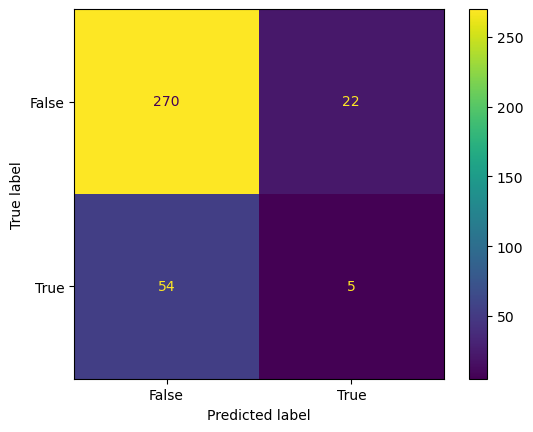

In [21]:
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(res_table['Flu'].fillna(0),res_table['prediction'])
print("CONFUSION MATRIX")
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

b) Design a Logistic Regression model to predict whether a student reported flu-like symptoms in the past year i.e., Flu(y) using forward selection to select most significant variables in the dataset as input variables. Which subset of features gave you the best performance? What are your thoughts on these features getting selected?

In [22]:
# Define the list of features
feat = ['Vaccin', 'HndWshQual', 'HndWshFreq', 'SociDist', 'NoFaceContact', 'RespEttiqu',
          'PersnDist', 'HandSanit', 'Risk', 'Inefficacy', 'KnowlTrans', 'KnowlMgmt']

# Define the minimum and maximum number of features to include in a combination
min_features = 2
max_features = 6

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(flu_df[feat], flu_df["Flu"], test_size=0.2)

best_accuracy = 0
best_feat_combination = []
best_classification_model = []
y_test_best = 0
y_pred_best = 0

# Try all possible combinations of features
for num_features in range(min_features, max_features+1):
    for feat_combination in itertools.combinations(feat, num_features):
        X_train_subset = X_train[list(feat_combination)]
        X_test_subset = X_test[list(feat_combination)]
        
        # Train a logistic regression model
        num_iter = 100

        # Calling the intercept and calculating the theta value
        intercept = np.ones((X.shape[0], 1)) 
        X = np.concatenate((intercept, X), axis=1)
        theta = np.zeros(X.shape[1])

        for i in range(num_iter):
            h = sigmoid(X, theta)
            gradient = gradient_descent(X, h, y)
            theta = update_weight_loss(theta, 0.1, gradient)
        
        result = sigmoid(X, theta)

        res_table = pd.DataFrame(np.around(result, decimals=6)).join(y)
        res_table['prediction'] = res_table[0].apply(lambda x : 0 if x < 0.5 else 1)

        accuracy = res_table.loc[res_table['prediction'] == res_table['Flu']].shape[0] / res_table.shape[0] * 100

        # Update best accuracy and feature combination
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feat_combination = feat_combination
            y_pred_best = res_table['prediction']
            y_test_best = res_table['Flu']

print("Best feature combination:", best_feat_combination)
print("Accuracy of logistic regression model for 3b:", best_accuracy)

Best feature combination: ('Vaccin', 'PersnDist', 'HandSanit')
Accuracy of logistic regression model for 3b: 68.09116809116809


CONFUSION MATRIX
[[292   0]
 [ 58   1]]


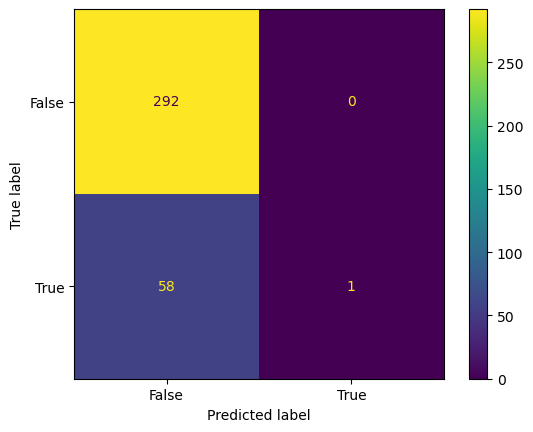

In [25]:
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_best.fillna(0),y_pred_best)
print("CONFUSION MATRIX")
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


c) Compare the performance of the full model built using all the features in (3a) with the resultant accuracies of the full model using the selected features (3b). Which set of features performed better?

Evaluate performance of your models using a metric discussed in class (such as confusion matrix). You may also use graphs for explaining your observations



*   The accuracy of model 3a is 64.38 with 275 records correctly predicted and 76 records incorrectly predicted. 
*   The accuracy of model 3b is 68.09 with 293 records correctly predicted and 58 records incorrectly predicted. 

With the above stats, it is evident that the model 3b using feature selection is better model. The set of features 'Vaccin', 'PersnDist', 'HandSanit' are performing well

## 4. Experimenting with regularization and Cost function.
a) Regularization and Feature Scaling: (20 points)
I. For the best performing model in Q 3 (Model from 3c), does regularization improve the performance?
II. Does Feature Scaling improve the performance for the model in Q 4a?
Evaluate performance for each case using a metric discussed in class (such as confusion matrix). You may also use graphs for explaining your observations.

In [23]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

# Updated with regularization by adding lambda to loss function
def loss(h, y, weight, lambda_):
    regularization = lambda_ * np.sum(np.square(weight))
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + regularization

# Updated with regularization by adding lambda to gradient descent function
def gradient_descent(X, h, y, weight, lambda_):
    regularization = 2 * lambda_ * weight
    return np.dot(X.T, (h - y)) / y.shape[0] + regularization

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [24]:
# 4a-1
X = flu_df[list(best_feat_combination)]
y = flu_df['Flu']

# add bias term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# initialize weights
weight = np.zeros(X.shape[1])

# set hyperparameters
learning_rate = 0.01
num_iterations = 1000
lambda_ = 0.01  # regularization strength

# train logistic regression model using gradient descent with L2 regularization
for i in range(num_iterations):
    h = sigmoid(X, weight)
    grad = gradient_descent(X, h, y, weight, lambda_)
    weight = update_weight_loss(weight, learning_rate, grad)
    if i % 100 == 0:
        loss_value = loss(h, y, weight, lambda_)
        print(f"iteration {i}: loss = {loss_value}")

iteration 0: loss = 0.6931500177102119
iteration 100: loss = 0.5124789950968393
iteration 200: loss = 0.5118204848230525
iteration 300: loss = 0.5112781221051909
iteration 400: loss = 0.5108021546458208
iteration 500: loss = 0.5103697847819189
iteration 600: loss = 0.5099697997821687
iteration 700: loss = 0.5095963337257838
iteration 800: loss = 0.5092460152148004
iteration 900: loss = 0.5089166583070815


In [25]:
result = sigmoid(X, weight)

res_table = pd.DataFrame(np.around(result, decimals=6)).join(y)
res_table['prediction'] = res_table[0].apply(lambda x : 0 if x < 0.5 else 1)

print("Accuracy for regularization model:", res_table.loc[res_table['prediction'] == res_table['Flu']].shape[0] / res_table.shape[0] * 100)

Accuracy for regularization model: 67.80626780626781


In [26]:
#4a-2
X = flu_df[list(best_feat_combination)]
y = flu_df['Flu']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# add bias term to X
X = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# initialize weights
weight = np.zeros(X.shape[1])

# set hyperparameters
learning_rate = 0.01
num_iterations = 1000
lambda_ = 0.01  # regularization strength

# train logistic regression model using gradient descent with L2 regularization
for i in range(num_iterations):
    h = sigmoid(X, weight)
    grad = gradient_descent(X, h, y, weight, lambda_)
    weight = update_weight_loss(weight, learning_rate, grad)
    if i % 100 == 0:
        loss_value = loss(h, y, weight, lambda_)
        print(f"iteration {i}: loss = {loss_value}")



iteration 0: loss = 0.6931473091340399
iteration 100: loss = 0.6022743384717729
iteration 200: loss = 0.5582064957559876
iteration 300: loss = 0.5359338475541248
iteration 400: loss = 0.5242034802181041
iteration 500: loss = 0.5178034175300622
iteration 600: loss = 0.5142057530786127
iteration 700: loss = 0.51212908385852
iteration 800: loss = 0.5108991954982335
iteration 900: loss = 0.5101505141409586


In [27]:
result = sigmoid(X, weight)

# Calculating accuracy
res_table = pd.DataFrame(np.around(result, decimals=6)).join(y)
res_table['prediction'] = res_table[0].apply(lambda x : 0 if x < 0.5 else 1)

print("Accuracy for scaling model :", res_table.loc[res_table['prediction'] == res_table['Flu']].shape[0] / res_table.shape[0] * 100)

Accuracy for scaling model : 67.80626780626781


CONFUSION MATRIX
[[292   0]
 [ 59   0]]


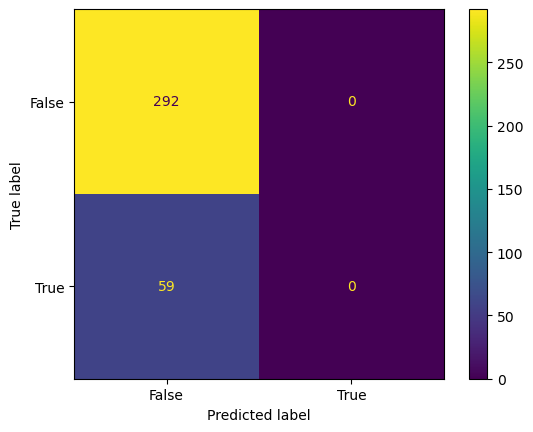

In [28]:
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(res_table['Flu'].fillna(0),res_table['prediction'])
print("CONFUSION MATRIX")
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

b) Cost Function: (15 points)
I. Keeping the best regularized (or not) model after the experiments from 4a, design a Logistic Regression model to predict whether a student reported flu-like symptoms in the past year i.e., Flu(y) by changing the cost function to the following.


In [29]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

# Updated the loss function to the given
def loss(X,h, y):
    return np.sum(np.square(h - y)) / (2 * len(X))

def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

def gradient_ascent(X, h, y):
    return np.dot(X.T, y - h)
    
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [30]:

X = flu_df[list(best_feat_combination)]
y = flu_df['Flu']

# Encoding the y column to numerical
y.replace(['not','flu'] , [0,1],inplace = True)

start_time = time.time()

num_iter = 100000

# Calling the intercept and calculating the theta value
intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    

In [31]:
result = sigmoid(X, weight)

# Calculating accuracy
res_table = pd.DataFrame(np.around(result, decimals=6)).join(y)
res_table['prediction'] = res_table[0].apply(lambda x : 0 if x < 0.5 else 1)

print("Accuracy of updated cost function:", res_table.loc[res_table['prediction'] == res_table['Flu']].shape[0] / res_table.shape[0] * 100)

Accuracy of updated cost function: 67.80626780626781


CONFUSION MATRIX
[[292   0]
 [ 59   0]]


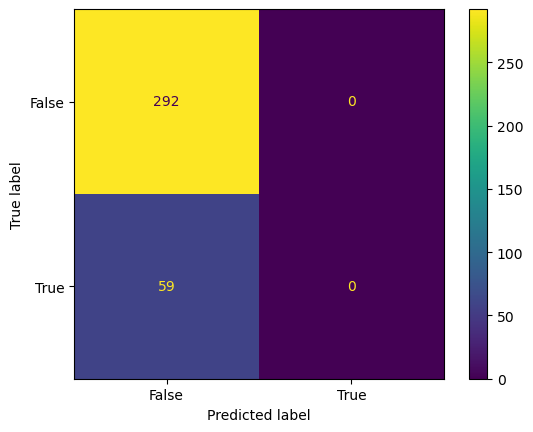

In [32]:
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(res_table['Flu'].fillna(0),res_table['prediction'])
print("CONFUSION MATRIX")
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

II. Compare the performance of both the models (4.b.i and 4.a.). Do they give the same solution with a difference in cost function?                                                              Evaluate performance for each case using a metric discussed in class (such as confusion matrix). You may also use graphs for explaining your observations.

 We can see that the accuracy of model 4a is 67.80 and that of model 4b-1 is 67.80. This implies that both the accuracies are similar no there is no effect of cost function on the model